In [ ]:
!apt-get update
!apt-get install g++ openjdk-8-jdk 
!pip3 install konlpy JPype1-py3
!bash <(curl -s https://raw.githubusercontent.com/konlpy/konlpy/master/scripts/mecab.sh)

In [2]:
from konlpy.tag import Kkma
import random
import pandas as pd
def how_many_words(keyword):
    tgr = Kkma()
    stopwords = []
    sf = open('koreanStopwords.txt', 'r', encoding='utf-8')
    while True:
        line = sf.readline().rstrip()
        if not line: break
        stopwords.append(line)
    sf.close()
    stopwords += tgr.nouns(keyword)
    stopwords += ['구매', '배송', '사용', '거', '만족', '배송', '제품', '상품', '주문', '포장', '가격', '이것', '맛', '감사']
    bow = {}
    def get_nouns(x):
        tokens = tgr.nouns(x.iloc[0])
        for t in tokens:
            if t in stopwords:
                continue
            try:
                bow[t] += 1
            except:
                bow[t] = 1
      
    reviews = pd.read_csv('ns_'+keyword+'_review_txt.csv', encoding='utf-8')
    reviews.drop_duplicates(['content'])
    reviews.apply(get_nouns, axis=1)

    bow_li = []
    for key in bow.keys():
        bow_li.append((key, bow[key]))
      
    bow_li.sort(key=lambda x:x[1], reverse=True)
    return bow_li

In [ ]:
yoga = how_many_words('요가매트')
yoga

In [ ]:
umbrella = how_many_words('우산')
umbrella

In [ ]:
chicken = how_many_words('닭가슴살')
chicken

In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

[('운동', 254), ('냄새', 224), ('두께', 165), ('색상', 159), ('신', 105), ('소음', 95), ('맘', 86), ('색', 84), ('감사', 81), ('간', 78), ('층', 76), ('바닥', 73), ('스트레칭', 73), ('마음', 72), ('폭', 66), ('걱정', 64), ('무릎', 62), ('보관', 61), ('구입', 60), ('저', 60), ('층간소음', 60), ('홈트', 59), ('처음', 59), ('쿠션', 59), ('추천', 58), ('사이즈', 57), ('느낌', 53), ('전', 52), ('고민', 52), ('색깔', 51), ('감', 45), ('듯', 40), ('색도', 40), ('폼', 39), ('동작', 39), ('크기', 38), ('밀림', 38), ('사진', 37), ('품질', 37), ('위', 36), ('폼롤러', 35), ('롤러', 35), ('스트랩', 35), ('와이드', 34), ('여', 34), ('선택', 33), ('굿', 33), ('폭신', 32), ('컬러', 32), ('고급', 32), ('감도', 32), ('부분', 31), ('방지', 31), ('튼튼', 30), ('기존', 30), ('재질', 29), ('이번', 29), ('고무', 29), ('색감', 28), ('필요', 27), ('자국', 27), ('하다', 26), ('성비', 26), ('시', 26), ('분', 26), ('가방', 25), ('8', 25), ('후기', 25), ('대비', 25), ('자세', 25), ('미끄럼', 24), ('엄마', 24), ('꺼', 24), ('끈', 24), ('건', 24), ('불편', 24), ('1', 24), ('촉감', 24), ('ㅎ', 23), ('2', 23), ('3', 22), ('바', 22), ('가격대비', 22), ('ㅠ', 21), (

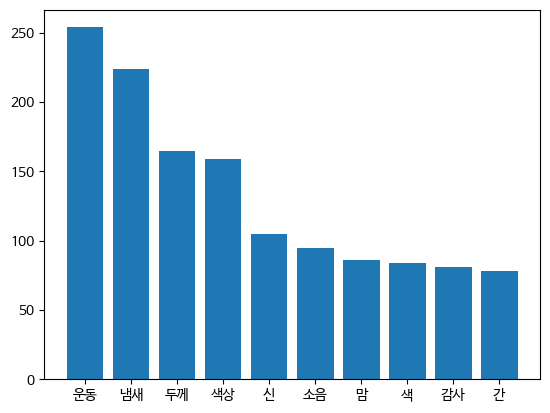

In [11]:
import matplotlib.pyplot as plt

plt.rc('font', family='NanumBarunGothic') 
print(yoga)
idx, values = zip(*yoga)
yoga_series = pd.Series(values, idx)
plt.bar(yoga_series.index[:10], yoga_series[:10])
plt.show()

[('다이어트', 366), ('처음', 237), ('다양', 215), ('팩', 189), ('감사', 170), ('이번', 168), ('아이스', 166), ('저', 165), ('소스', 154), ('추천', 129), ('전', 125), ('아이스팩', 124), ('간편', 122), ('여', 118), ('상태', 117), ('단백질', 113), ('여기', 103), ('종류', 100), ('전자', 99), ('3', 98), ('샐러드', 97), ('분', 96), ('밥', 93), ('최고', 92), ('스테이크', 92), ('냉동실', 91), ('구입', 91), ('ㅎ', 90), ('양념', 90), ('다음', 85), ('식단', 83), ('냉동', 83), ('하림', 81), ('배', 78), ('ㅠ', 77), ('볼', 76), ('오리지널', 76), ('브랜드', 76), ('박스', 73), ('입', 72), ('저녁', 72), ('후', 72), ('번째', 71), ('허', 71), ('아침', 70), ('허닭', 70), ('도착', 69), ('진짜', 68), ('대용', 67), ('식', 67), ('끼', 66), ('소세지', 65), ('미트리', 65), ('운동', 64), ('입맛', 63), ('치즈', 63), ('점심', 63), ('해동', 62), ('2', 62), ('염', 61), ('미', 61), ('아이', 60), ('트리', 60), ('1', 59), ('리', 58), ('이용', 57), ('니', 57), ('의사', 57), ('스팀', 56), ('한번', 56), ('레인지', 56), ('일반', 55), ('전자레인지', 55), ('유통', 53), ('느낌', 52), ('냄새', 52), ('후기', 52), ('용', 52), ('렌지', 52), ('듯', 51), ('칼로리', 51), ('건', 51), ('

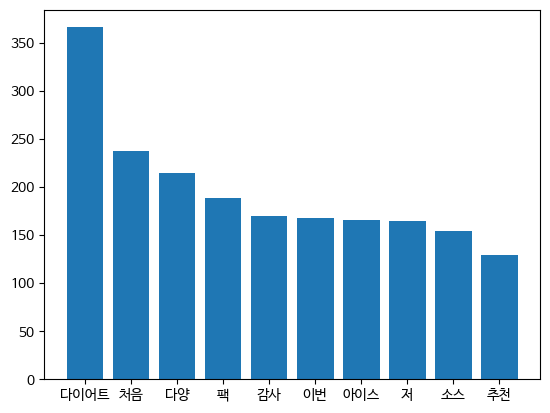

In [13]:
print(chicken)
idx, values = zip(*chicken)
chicken_series = pd.Series(values, idx)
plt.bar(chicken_series.index[:10], chicken_series[:10])
plt.show()